# SAN - Praktische Arbeit (Marvel Universe Social Network)

## Netzwerkanalyse

In [9]:
import os
import sys
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from helper import *

## Daten einlesen

In [10]:
nodes = pd.read_csv('Daten/nodes.csv')
edges = pd.read_csv('Daten/edges.csv')
hero_network = pd.read_csv('Daten/hero-network.csv')

print(nodes.head())
print(edges.head())
print(hero_network.head())

                   node   type
0               2001 10  comic
1                2001 8  comic
2                2001 9  comic
3  24-HOUR MAN/EMMANUEL   hero
4  3-D MAN/CHARLES CHAN   hero
                   hero   comic
0  24-HOUR MAN/EMMANUEL  AA2 35
1  3-D MAN/CHARLES CHAN   AVF 4
2  3-D MAN/CHARLES CHAN   AVF 5
3  3-D MAN/CHARLES CHAN   COC 1
4  3-D MAN/CHARLES CHAN  H2 251
                  hero1                 hero2
0         LITTLE, ABNER        PRINCESS ZANDA
1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3         LITTLE, ABNER        PRINCESS ZANDA
4         LITTLE, ABNER  BLACK PANTHER/T'CHAL


# Verbindung zwischen captain america,ironman and spiderman

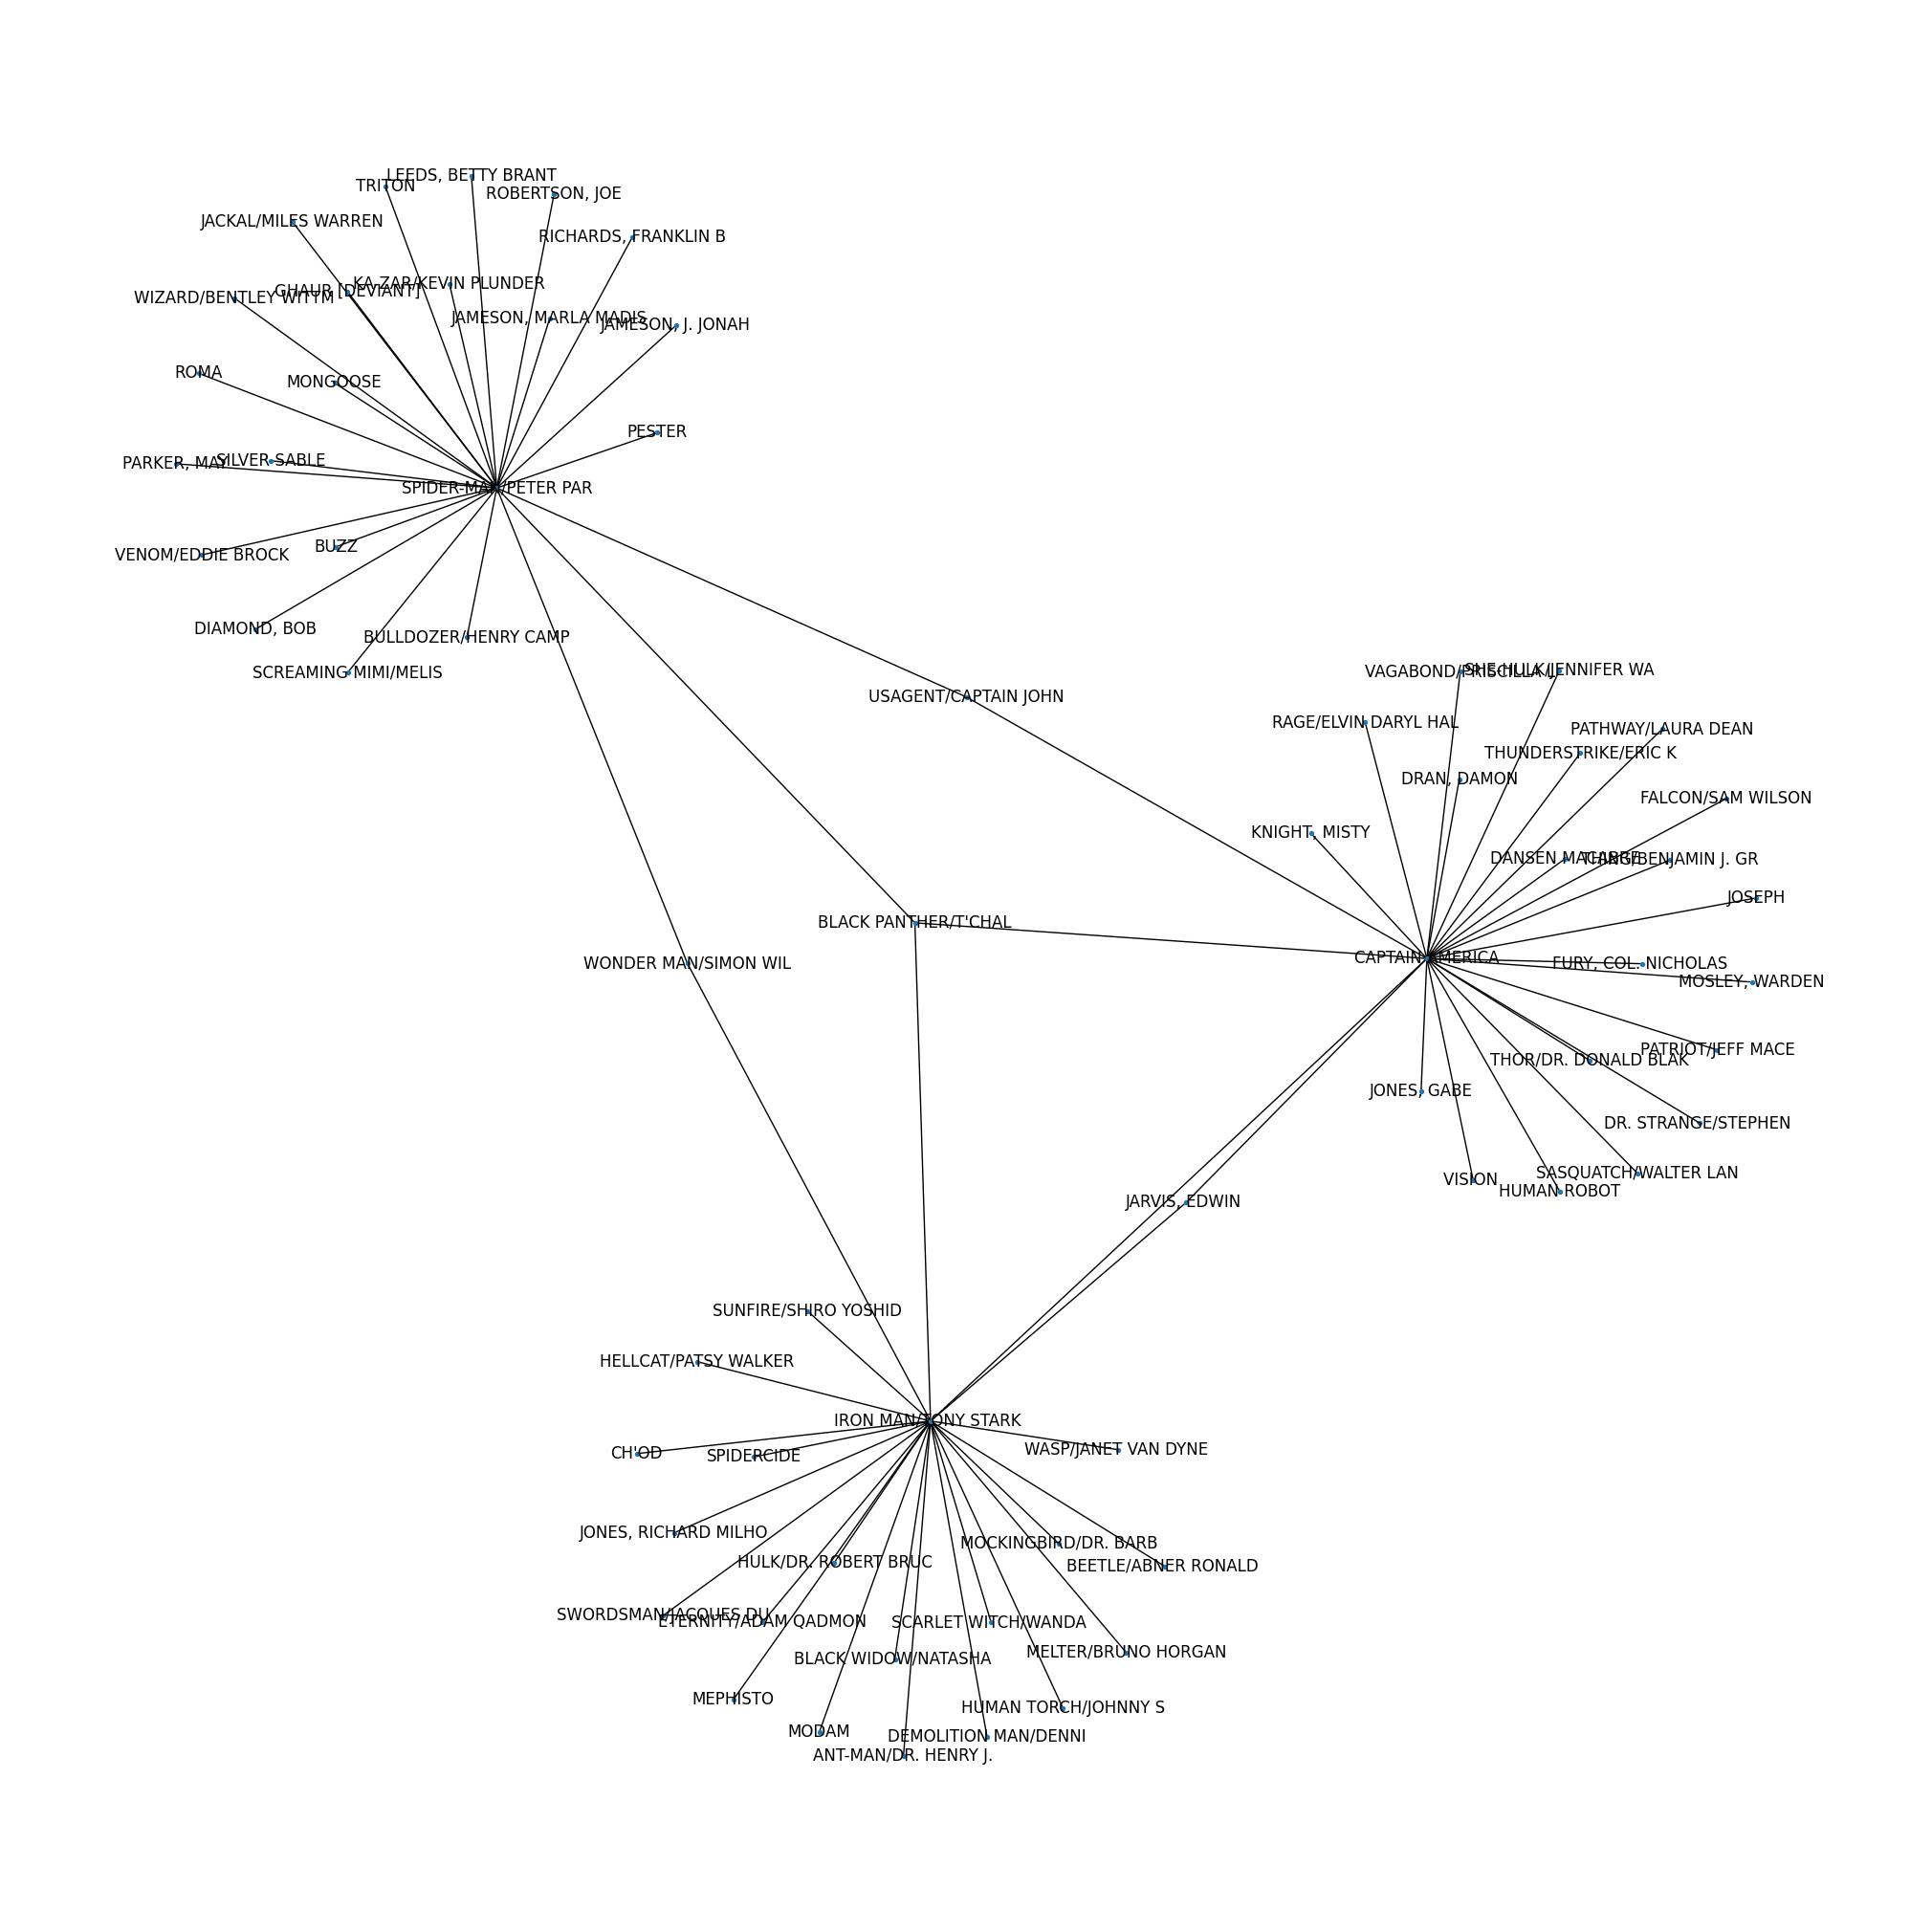

In [11]:
# connection between captain america,ironman and spiderman
captAmerica = Subset = hero_network[hero_network['hero1'] == 'CAPTAIN AMERICA'].sample(25)
ironMan = hero_network[hero_network['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)
spiderMan = hero_network[hero_network['hero1'].str.contains('SPIDER-MAN/PETER PAR')].sample(25)
Subset = pd.concat([captAmerica, ironMan, spiderMan], axis=0)

G = nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, node_size=8)
plt.show()

Im EDA haben wir herausgefunden, dass Captain America, Ironman und Spider-Man im `hero-network.csv` die meisten verbindungen haben. Dehalb geben wir diese 3 Helden als Subset aus und visualisieren diese.

# 1. Frage - Welche Helden sind die zentralsten im Netzwerk?

Um die Frage zu beantworten, welche Helden die zentralsten im Netzwerk sind, werden wir die drei genannten Zentralitätsmaße verwenden: Degree-Centrality, Betweenness-Centrality und Closeness-Centrality. Diese Maße geben jeweils unterschiedliche Aspekte der Zentralität eines Knotens im Netzwerk an:
- Degree-Centrality misst die Anzahl der direkten Verbindungen, die ein Knoten hat. Für Helden in unserem Netzwerk bedeutet ein hoher Wert, dass sie in vielen verschiedenen Comics erscheinen.
- Betweenness-Centrality gibt an, wie oft ein Knoten auf den kürzesten Pfaden zwischen anderen Knoten liegt. Ein hoher Wert deutet darauf hin, dass der Held eine wichtige Rolle in der Verbindung verschiedener Teile des Netzwerks spielt.
- Closeness-Centrality misst, wie nahe ein Knoten im Durchschnitt zu allen anderen Knoten im Netzwerk liegt. Ein hoher Wert zeigt an, dass ein Held im Durchschnitt schneller mit anderen Knoten verbunden werden kann.

Da das Netzwerk bipartit ist, muss beachtet werden, dass Closeness-Centrality für große Netzwerke möglicherweise nicht gut definiert ist, da nicht alle Knoten miteinander verbunden sind (Helden sind nur mit Comics verbunden, nicht direkt mit anderen Helden). Trotzdem führen wir die Analyse für alle drei Maße durch.

In [ ]:
import networkx as nx
import pandas as pd


# Erstellen des Netzwerks
B = nx.Graph()
B.add_nodes_from(nodes[nodes['type'] == 'hero']['node'], bipartite=0, type='hero')
B.add_nodes_from(nodes[nodes['type'] == 'comic']['node'], bipartite=1, type='comic')
B.add_edges_from(edges.values)

# Berechnung der Zentralitätsmaße
degree_centrality = nx.degree_centrality(B)
betweenness_centrality = nx.betweenness_centrality(B)
closeness_centrality = nx.closeness_centrality(B)

# Filterung für Helden
hero_degree = {node: centrality for node, centrality in degree_centrality.items() if B.nodes[node]['type'] == 'hero'}
hero_betweenness = {node: centrality for node, centrality in betweenness_centrality.items() if B.nodes[node]['type'] == 'hero'}
hero_closeness = {node: centrality for node, centrality in closeness_centrality.items() if B.nodes[node]['type'] == 'hero'}

# Top 10 Helden basierend auf den Zentralitätsmaßen
top_10_heroes_degree = sorted(hero_degree.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_heroes_betweenness = sorted(hero_betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_heroes_closeness = sorted(hero_closeness.items(), key=lambda x: x[1], reverse=True)[:10]

top_10_heroes_degree, top_10_heroes_betweenness, top_10_heroes_closeness
